## <font color='red'>Processo de Construção, Treinamento, Avaliação e Seleção de Modelos Para Classificação</font>
### O paciente vai ou não desenvolver uma doença hepática?

In [1]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## Carregando o Conjunto de dados

In [2]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
dados.shape

(583, 11)

In [4]:
# Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
# Amostra dos dados
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
78,70,Male,1.4,0.6,146,12,24,6.2,3.8,1.58,2
426,45,Male,1.3,0.6,166,49,42,5.6,2.5,0.80,2
109,36,Male,0.9,0.1,486,25,34,5.9,2.8,0.90,2
85,14,Male,1.4,0.5,269,58,45,6.7,3.9,1.40,1
102,17,Male,0.9,0.2,224,36,45,6.9,4.2,1.55,1
189,48,Female,0.8,0.2,218,32,28,5.2,2.5,0.90,2
141,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40,1
163,39,Male,1.9,0.9,180,42,62,7.4,4.3,1.38,1
224,70,Male,1.7,0.5,400,56,44,5.7,3.1,1.10,1
363,42,Female,0.9,0.2,165,26,29,8.5,4.4,1.00,2


## Análise Exploratória de Dados

In [6]:
# Tipos de dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
# Variáveis categóricas
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [8]:
# Variáveis não categóricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploração das Variáveis Numéricas

In [9]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


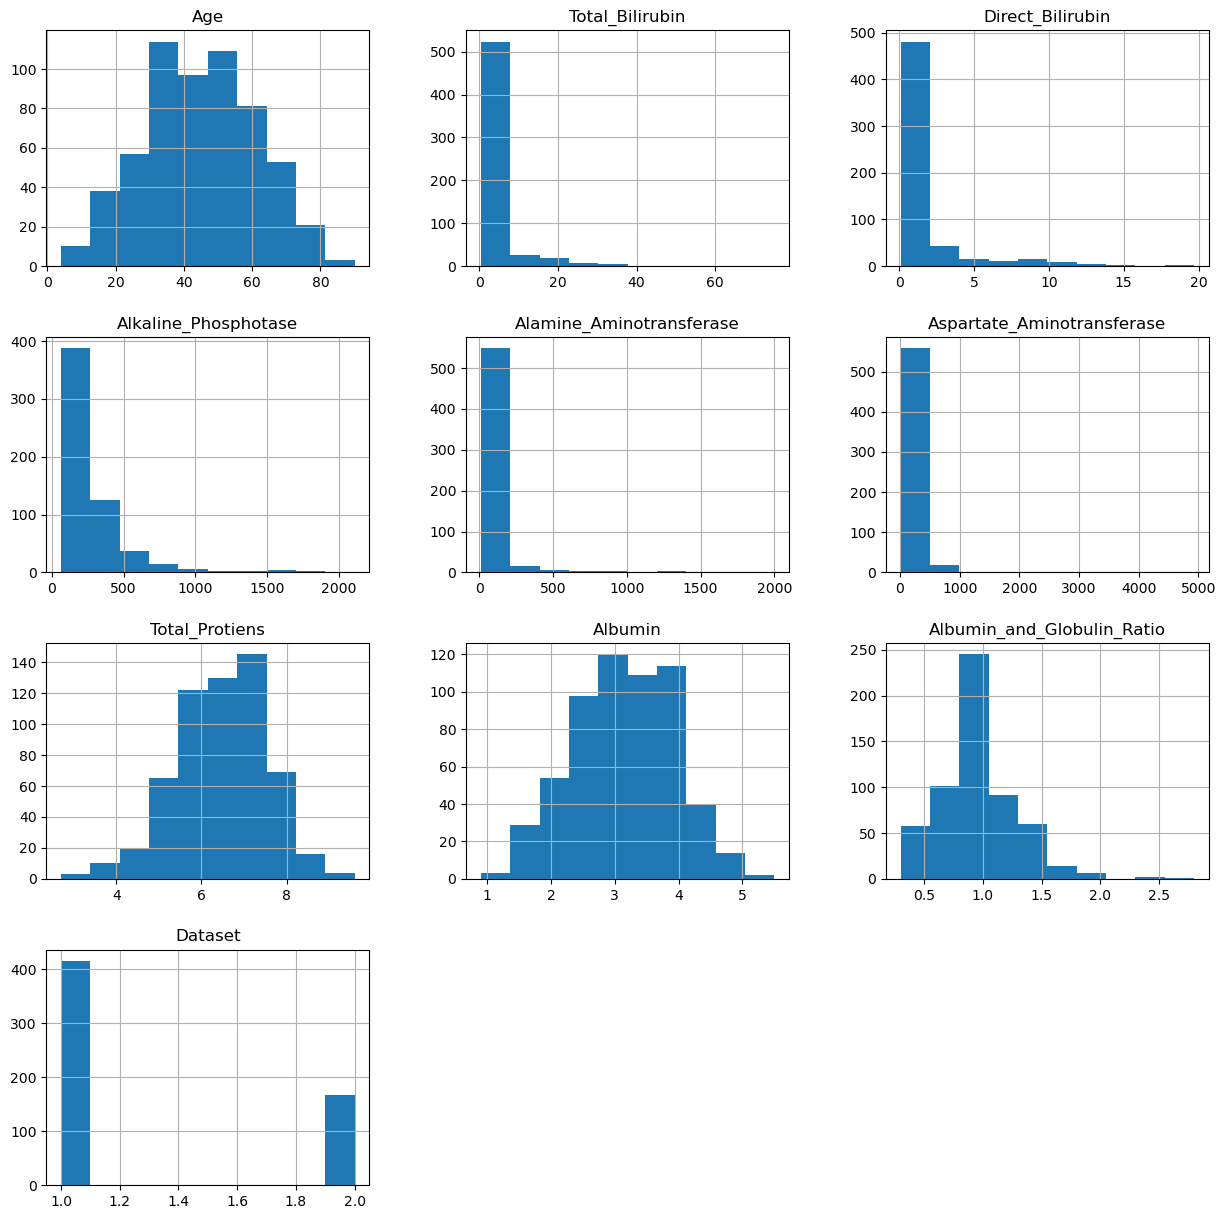

In [10]:
# Plot 
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.

A coluna dataset (variável target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

In [11]:
# Função para ajustar a variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [12]:
# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [13]:
# Vamos ajustar o nome da variável target
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [14]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
183,40,Male,0.6,0.1,171,20,17,5.4,2.5,0.8,1
534,39,Male,1.6,0.8,230,88,74,8.0,4.0,1.0,0
436,23,Male,1.0,0.3,212,41,80,6.2,3.1,1.0,1
51,34,Female,0.6,0.1,161,15,19,6.6,3.4,1.0,1
195,60,Male,2.4,1.0,1124,30,54,5.2,1.9,0.5,1


### Exploração da Variável Categórica

In [15]:
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino:  441
Número de pacientes do sexo feminino:  142


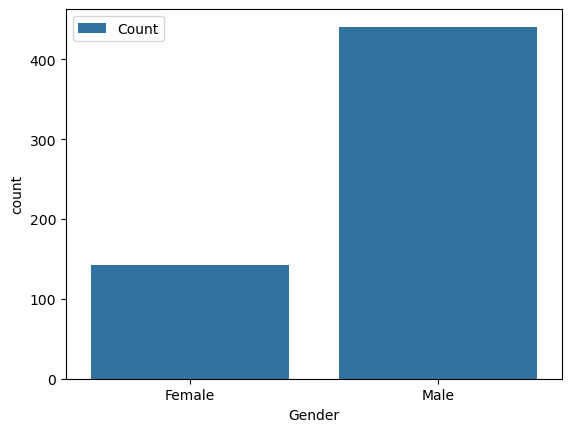

In [16]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

Vamos aproveitar e já transformar a variável categórica em sua representação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação de gráficos a seguir.

In [17]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [18]:
# Aplica a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [19]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
294,22,0,2.4,1.0,340,25,21,8.3,4.5,1.10,1
229,46,0,0.6,0.2,290,26,21,6.0,3.0,1.00,1
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
155,34,0,8.7,4.0,298,58,138,5.8,2.4,0.70,1
28,20,0,1.1,0.5,128,20,30,3.9,1.9,0.95,0


### Verificando a Relação Entre Atributos

In [20]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


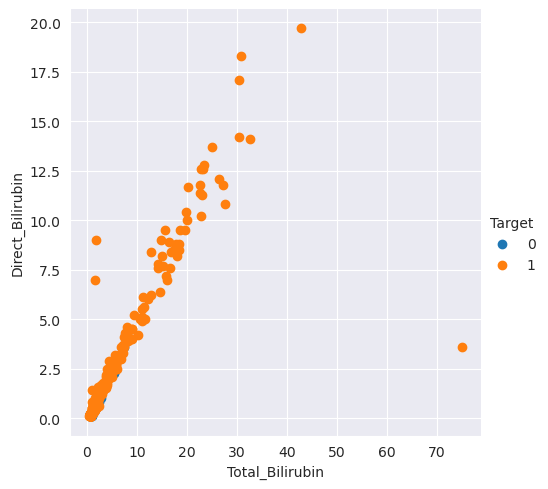

In [21]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue='Target', height=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()


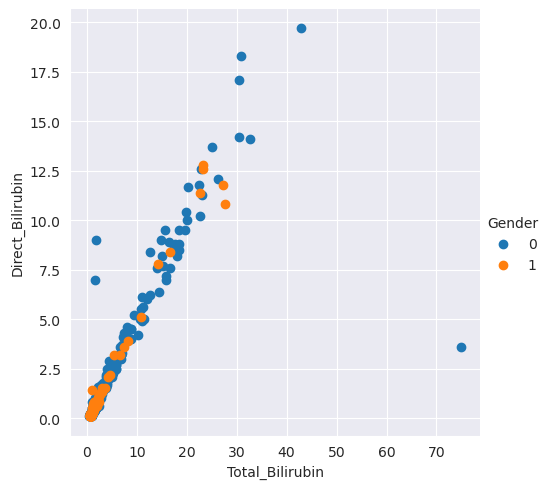

In [22]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

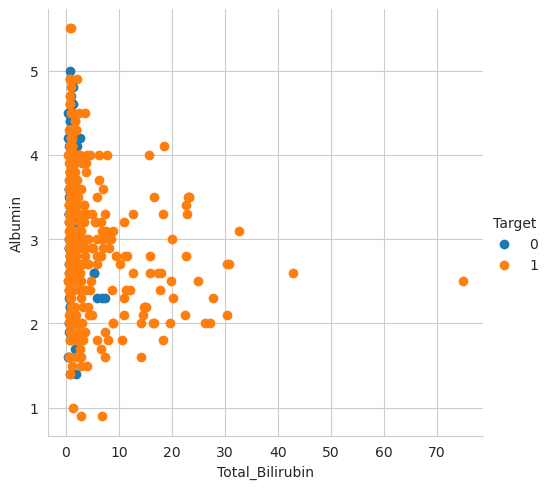

In [23]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

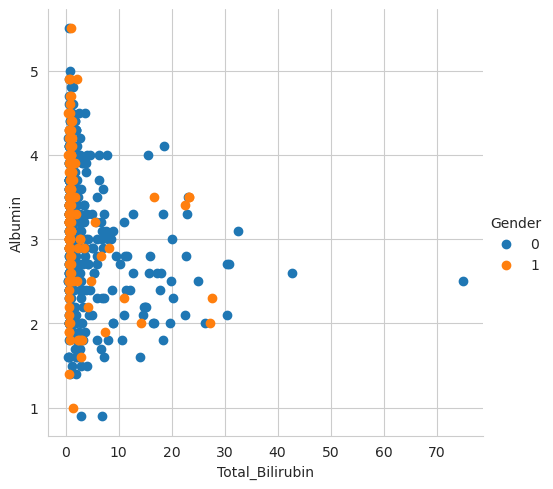

In [24]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

### Verificando Valores Ausentes e Registros Duplicados

In [25]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [26]:
# Verificando registros duplicados (complete cases)
# Complete cases também se refere a linhas onde não há valores ausentes
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento de Registros Duplicados

In [27]:
dados.shape

(583, 11)

In [28]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


### Tratamento de Outliers

In [29]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<Axes: ylabel='Alamine_Aminotransferase'>

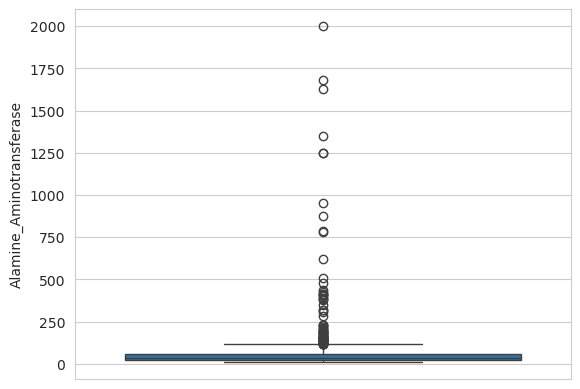

In [30]:
# Boxplot
sns.boxplot(dados.Alamine_Aminotransferase)

Será que os valores extremos são mesmo outliers?

In [31]:
# Contagem de frequência por valor
dados.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

<Axes: ylabel='Aspartate_Aminotransferase'>

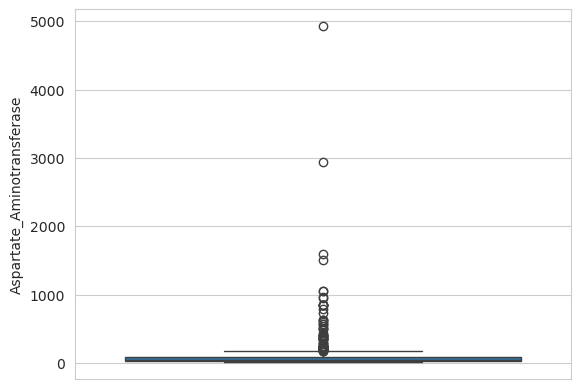

In [32]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [33]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [34]:
# Mantém somente os registros onde o valor for menor ou igual a 3000
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

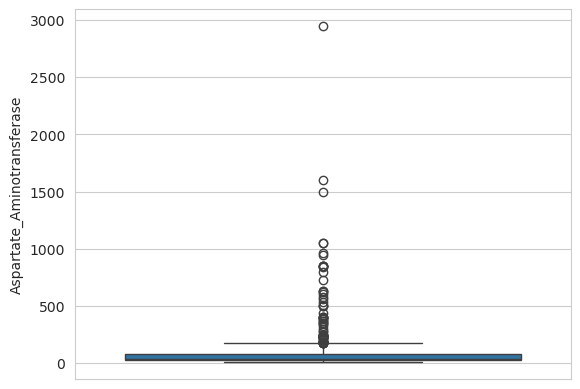

In [35]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [36]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [37]:
# Mantém somente os registros onde o valor for menor ou igual a 2500
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

In [38]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Tratamento de Valores Ausentes

In [39]:
# Verifica se há valor ausente
dados.isnull().values.any()

True

In [40]:
# Verifica quantas colunas tem valor ausente
dados.isnull().values.any().sum()

1

In [41]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [42]:
dados.shape

(568, 11)

In [43]:
# Drop dos registros com valores ausentes em qualquer coluna (any)
dados = dados.dropna(how = 'any')  

In [44]:
dados.shape

(564, 11)

In [45]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [46]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
353,48,1,1.4,0.8,621,110,176,7.2,3.9,1.10,1
310,51,0,0.8,0.2,175,48,22,8.1,4.6,1.30,1
237,35,1,0.9,0.3,158,20,16,8.0,4.0,1.00,1
170,72,0,1.7,0.8,200,28,37,6.2,3.0,0.93,1
121,32,0,22.7,10.2,290,322,113,6.6,2.8,0.70,1


## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [47]:
# Data a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin
dados = dados.drop('Direct_Bilirubin', axis = 1)

In [48]:
dados.shape

(564, 10)

### Divisão em Treino e Teste

In [49]:
dados.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


In [50]:
# Cria um objeto separado para a variável target
y = dados.Target

In [51]:
# Cria um objeto separadado para as variáveis de entrada
X = dados.drop('Target', axis = 1)

In [52]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados.Target)

In [53]:
len(X_treino)

423

In [54]:
len(X_teste)

141

In [55]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


In [56]:
X_treino.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0


### Balanceamento de Classe

In [57]:
y_treino.value_counts()

Target
1    301
0    122
Name: count, dtype: int64

In [58]:
# Instala o pacote
!pip install -q imblearn

In [59]:
# Carrega a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [61]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

__Por que o balanceamento de classes é feito apenas nos dados de treino?__  

__Foco no aprendizado do modelo:__ O objetivo do balanceamento nos dados de treinamento é garantir que o modelo tenha acesso a uma quantidade suficiente de exemplos representativos de todas as classes. Isso evita que ele fique "enviesado" em relação à classe majoritária (ou com maior frequência), aprendendo pouco ou nada sobre a classe minoritária. Por exemplo, no caso de prever o desenvolvimento de uma doença em homens e mulheres, sem balanceamento o modelo poderia aprender que a melhor estratégia para minimizar erros é simplesmente sempre prever a classe majoritária (por exemplo, que "mulheres têm mais chances de desenvolver a doença", caso elas sejam mais representadas nos dados). Com o balanceamento, você força o modelo a "dar atenção" proporcional a ambas as classes.  

__Testes e aplicações simulam o mundo real:__ Os dados de teste (e os dados do mundo real onde o modelo será aplicado) devem refletir a distribuição verdadeira da população. Isso porque, durante a aplicação prática, você não terá controle sobre o balanceamento das classes — o que chega para o modelo será aquilo que está presente no mundo real. O desempenho nos dados de teste (não balanceados) é uma medida mais realista de como o modelo irá se comportar na prática.  

Em resumo, os dados de teste servem para avaliar se o modelo treinado está realmente preparado para lidar com a distribuição original (e geralmente desbalanceada) dos dados, que é o que você enfrentará no mundo real.  

Evitar "leakage" nos testes: Se você balanceasse os dados de teste, estaria manipulando a amostra de avaliação, o que pode levar a uma métrica irrealista do desempenho do modelo. Por exemplo, balancear as classes no teste poderia inflar artificialmente métricas como acurácia ou recall, mas não refletiria como o modelo se sairia em uma aplicação prática.  

In [62]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [63]:
len(X_res)

602

In [64]:
len(y_res)

602

In [65]:
y_res.value_counts()

Target
1    301
0    301
Name: count, dtype: int64

In [66]:
# Ajusta o nome do dataset de treino para X
X_treino = X_res

In [67]:
# Ajusta o nome do dataset de treino para y
y_treino = y_res

### Padronização dos Dados

In [68]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [69]:
# Calculamos média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

Age                            43.426910
Gender                          0.217608
Total_Bilirubin                 2.692772
Alkaline_Phosphotase          271.191030
Alamine_Aminotransferase       62.707641
Aspartate_Aminotransferase     77.835548
Total_Protiens                  6.538512
Albumin                         3.240055
Albumin_and_Globulin_Ratio      0.988938
dtype: float64
Age                            16.315386
Gender                          0.412963
Total_Bilirubin                 5.567512
Alkaline_Phosphotase          224.673537
Alamine_Aminotransferase      140.125500
Aspartate_Aminotransferase    144.341864
Total_Protiens                  1.038308
Albumin                         0.766474
Albumin_and_Globulin_Ratio      0.305331
dtype: float64


In [70]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [71]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.096418,-0.526944,-0.034624,-0.481548,-0.247690,-0.386829,1.022325,0.991481,0.363743
1,1.751297,-0.526944,-0.339967,-0.548311,-0.283372,-0.296765,-0.518644,-0.313194,0.036230
2,-1.558462,-0.526944,-0.339967,0.048110,0.066315,0.430675,-1.000197,-0.965532,-0.618797
3,-0.087458,-0.526944,1.114902,0.003601,-0.226280,-0.116637,-0.711265,-1.617870,-1.601338
4,-0.087458,-0.526944,-0.339967,-0.641780,-0.240553,-0.331405,-1.578060,-0.704597,0.691257


In [72]:
# Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,-1.239319e-16,-7.081821e-17,-5.901518e-17,-5.901518e-17,-5.901518e-18,3.540911e-17,-3.326981e-16,-2.419622e-16,-3.540911e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.416548e+00,-5.269437e-01,-4.118126e-01,-9.266380e-01,-3.761460e-01,-4.699645e-01,-3.696892e+00,-3.053014e+00,-2.256365e+00
25%,-7.003763e-01,-5.269437e-01,-3.408199e-01,-4.459405e-01,-2.905084e-01,-3.729725e-01,-6.149546e-01,-6.848708e-01,-6.187975e-01
50%,9.641756e-02,-5.269437e-01,-3.192854e-01,-3.257661e-01,-2.227121e-01,-2.898366e-01,5.921921e-02,-4.419030e-02,3.622956e-02
75%,7.093359e-01,-5.269437e-01,-1.423925e-01,5.812420e-02,-7.106231e-02,-7.680064e-02,7.222199e-01,8.593479e-01,5.570730e-01
max,2.854550e+00,1.894584e+00,1.298735e+01,8.184359e+00,1.154174e+01,1.054555e+01,2.948535e+00,2.948495e+00,5.931473e+00


### Por que usamos média e desvio dos dados de treino para padronizar os dados de teste?
![Padronizar](imgs/padronizar.png)

1. Evitar vazamento de informações (data leakage): Durante o treinamento, o modelo deve aprender apenas com os dados de treinamento. Se usássemos a média e o desvio padrão dos dados de teste para padronizar os próprios dados de teste, estaríamos "olhando" informações que o modelo não deveria ter acesso durante o treinamento. Isso introduziria um viés no modelo, já que ele estaria indiretamente aprendendo sobre os dados de teste antes de ser avaliado.  

2. Simular o comportamento em produção: Na prática, quando o modelo é aplicado em produção, ele nunca terá acesso a novos dados para recalcular a média e o desvio padrão. Assim, usamos os valores calculados no treinamento para garantir que o modelo possa ser aplicado a dados futuros de maneira consistente. Os dados novos serão padronizados da mesma forma que os dados de teste foram, garantindo uma padronização consistente.  

3. Consistência na escala dos dados: Durante o treinamento, o modelo aprende a interpretar os dados com base na escala fornecida pela padronização (isto é, considerando a média e o desvio padrão do treinamento). Se usássemos métricas diferentes para padronizar os dados de teste (como as estatísticas do próprio conjunto de teste), a escala seria diferente, e o modelo poderia se comportar de maneira imprevisível.  

### O que acontece se não seguirmos essa regra?
__Se usássemos a média e o desvio padrão do conjunto de teste para padronizar os dados de teste:__  
1. Estaríamos introduzindo informações que não estavam disponíveis no momento do treinamento, o que leva a uma avaliação irrealista do modelo.  
2. Poderíamos obter métricas de desempenho infladas ou artificiais, porque os dados de teste teriam sido tratados de forma diferente em relação aos de produção.  

__Exemplo prático:__  
Imagine que temos uma feature idade, com os seguintes valores:  

Dados de treinamento: [20,25,30,35,40]  
Média (𝜇) = 30  
Desvio padrão (𝜎) = 7.91  
  
Dados de teste: [22,28,33,38]  
Ao padronizar os dados de teste:  
Usamos média = 30 e desvio padrão = 7.91 (calculados do treino).  
Aplicamos a fórmula 𝑧 = 𝑥−30 / 7.91  

_Se usássemos a média e o desvio padrão do teste (em vez do treino), a transformação seria diferente, o que quebraria a consistência._

In [73]:
# Usamos média e desvio de treino para padronizar o conjunto de dados de teste
X_teste = (X_teste - treino_mean) / treino_std

In [74]:
# Describe
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.393917,-0.526944,-0.339967,-0.552762,-0.254826,-0.220557,-1.481749,-0.965532,0.036230
448,0.280293,1.894584,-0.339967,-0.575017,-0.261963,-0.366045,-0.518644,-0.835065,-0.946311
509,0.157709,-0.526944,3.108611,-0.076516,0.551594,3.201874,-1.096507,-0.313194,0.691257
415,1.628714,-0.526944,-0.250161,1.864078,0.216180,-0.262125,-2.830097,-0.704597,-0.946311
56,-0.639084,-0.526944,-0.339967,-0.325766,-0.261963,-0.379901,1.407567,0.991481,0.036230


###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Como se trata da primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [75]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [76]:
# Criaremos o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [77]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [78]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=1)

In [79]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [80]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [81]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [82]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[7.30945599e-01, 2.69054401e-01],
       [5.19957216e-01, 4.80042784e-01],
       [2.28977614e-04, 9.99771022e-01],
       [6.92638986e-01, 3.07361014e-01],
       [6.83075217e-01, 3.16924783e-01],
       [6.10143097e-01, 3.89856903e-01],
       [7.62516734e-01, 2.37483266e-01],
       [1.26482706e-01, 8.73517294e-01],
       [6.60851141e-01, 3.39148859e-01],
       [1.72069910e-02, 9.82793009e-01]])

In [83]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [84]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.2690544 , 0.48004278, 0.99977102, 0.30736101, 0.31692478,
       0.3898569 , 0.23748327, 0.87351729, 0.33914886, 0.98279301])

In [85]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.8048721354646657


In [86]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[32,  8],
       [42, 59]])

In [87]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [88]:
print(tn, fp, fn, tp)

32 8 42 59


In [89]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.6920792079207922


In [90]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [91]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7383663366336634


In [92]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6453900709219859


### Feature Importance

In [93]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [94]:
# Obtemos os coeficientes pelo maior maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [95]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Aspartate_Aminotransferase
Alamine_Aminotransferase
Albumin
Total_Protiens
Age
Albumin_and_Globulin_Ratio
Gender
Alkaline_Phosphotase


In [96]:
# Salva o modelo em disco
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl') 

In [97]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [98]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [99]:
# Adiciona o dict ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_v1])], ignore_index=True)

In [100]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.692079,0.738366,0.64539


### Construção, Treinamento e Avaliação do Modelo 2 com Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Nosso desafio agora é tentar obter um modelo melhor que a versão 1. Vamos tentar o algoritmo Random Forest.

In [101]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [102]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [103]:
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [104]:
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=500)

In [105]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [106]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [107]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v2)

array([[18, 22],
       [17, 84]])

In [108]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.6408415841584157


In [109]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [110]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7428217821782178


In [111]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.723404255319149


### Feature Importance

In [112]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [113]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Alamine_Aminotransferase
Age
Total_Protiens
Albumin_and_Globulin_Ratio
Albumin
Gender


In [114]:
# Salva o modelo em disco
with open('modelos/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelos/modelo_v2.pkl') 

In [115]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [116]:
# Adiciona o dict ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_v2])], ignore_index=True)


In [117]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.692079,0.738366,0.645390
1,modelo_v2,Random Forest,0.640842,0.742822,0.723404


### Construção, Treinamento e Avaliação do Modelo 3 com KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Vamos tentar agora um algoritmo mais simples, o KNN. Para esse algoritmo precisamos antes definir o valor de K, que é o número de vizinhos mais próximos.

In [118]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

In [119]:
# Lista para os scores
cv_scores = []

In [120]:
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())   

In [121]:
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

In [122]:
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 1


In [123]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [124]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [125]:
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)

In [126]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v3)

array([[20, 20],
       [37, 64]])

In [127]:
# Previsão de probabilidade da classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [128]:
# Calcula ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.5668316831683169


In [129]:
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [130]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.5668316831683169


In [131]:
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.5957446808510638


Obs: Com o algoritmo KNN não extraímos as variáveis mais importantes, pois o conceito do algoritmo é diferente.

In [132]:
# Salva o modelo em disco
with open('modelos/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'modelos/modelo_v3.pkl') 

In [133]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [134]:
# Adiciona o dict ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_v3])], ignore_index=True)

In [135]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.692079,0.738366,0.645390
1,modelo_v2,Random Forest,0.640842,0.742822,0.723404
2,modelo_v3,KNN,0.566832,0.566832,0.595745


### Construção, Treinamento e Avaliação do Modelo 4 com Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Na versão 4 do modelo usaremos um modelo de árvore de decisão.

In [136]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [137]:
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [138]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [139]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=5)

In [140]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [141]:
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [142]:
# Confusion matrix
confusion_matrix(y_teste, y_pred_v4)

array([[27, 13],
       [44, 57]])

In [143]:
# Calcula ROC AUC score
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.6196782178217822


In [144]:
# Curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [145]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6597772277227723


In [146]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.5957446808510638


### Feature Importance

In [147]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [148]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Albumin
Alamine_Aminotransferase
Age
Albumin_and_Globulin_Ratio
Gender
Total_Protiens


In [149]:
# Salva o modelo em disco
with open('modelos/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelos/modelo_v4.pkl') 

In [150]:
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [151]:
# Adiciona o dict ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_v4])], ignore_index=True)

In [152]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.692079,0.738366,0.645390
1,modelo_v2,Random Forest,0.640842,0.742822,0.723404
2,modelo_v3,KNN,0.566832,0.566832,0.595745
3,modelo_v4,Decision Tree,0.619678,0.659777,0.595745


### Construção, Treinamento e Avaliação do Modelo 5 com SVM

https://scikit-learn.org/stable/modules/svm.html

Para a quinta e última versão do modelo usaremos SVM.

In [153]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [154]:
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [155]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

In [156]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [157]:
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)

In [158]:
confusion_matrix(y_teste, y_pred_v5)

array([[16, 24],
       [30, 71]])

In [159]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [160]:
# Calcula ROC AUC score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5514851485148515


In [161]:
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [162]:
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.6024752475247525


In [163]:
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.6170212765957447


In [164]:
# Salva o modelo em disco
with open('modelos/modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'modelos/modelo_v5.pkl') 

In [165]:
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [166]:
# Adiciona o dict ao dataframe
df_modelos = pd.concat([df_modelos, pd.DataFrame([dict_modelo_v5])], ignore_index=True)

In [167]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.692079,0.738366,0.645390
1,modelo_v2,Random Forest,0.640842,0.742822,0.723404
2,modelo_v3,KNN,0.566832,0.566832,0.595745
3,modelo_v4,Decision Tree,0.619678,0.659777,0.595745
4,modelo_v5,SVM,0.551485,0.602475,0.617021


### Seleção do Melhor Modelo

In [168]:
# Usaremos o modelo que teve o maior AUC Score, por se tratar de uma métrica global
# O score AUC é o ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

In [169]:
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
1,modelo_v2,Random Forest,0.640842,0.742822,0.723404


## Previsões com o Melhor Modelo Treinado

In [170]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v2'

In [171]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load('modelos/' + modelo + '.pkl')
melhor_modelo

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [172]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [173]:
# Dados brutos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [174]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [175]:
# Agora você pode fazer a padronização
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [176]:
# Converte o objeto para array
arr_paciente = np.array(arr_paciente)

In [177]:
# Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([ 1.75129719,  1.8945837 , -0.33996726, -0.37917697, -0.34046367,
       -0.33833253,  0.54077189,  0.20867599, -0.06202449])

In [178]:
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [179]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática!')
else:
    print('Este paciente não deve apresentar doença hepática!')

Este paciente não deve apresentar doença hepática!


# Fim